# Exploratory Analysis

## Problems:

Load the NYC AirBnB Truncated Dataset. This dataset is a mirror of the full NYC AirBnB dataset found at Kaggle, but only contains the first 10,000 entries.

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

For the numerical features,

1) Display histograms for the numerical features.

2) Construct the scatter plots of price with each of the numerical features.

3) Display the correlation histogram.  

4) Which numerical feature appears to be most predictive of the price?

4) Using numerical features to predict the renting price with linear model. Write down the predict function.

6) Calculate the RSS cost.  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/NYCAirBnB/train.csv")
data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Cozy apt in heart of the e village,40076332,Steven,Manhattan,East Village,40.72644,-73.98403,Entire home/apt,175,5,0,NaN,NaN,1,0
9995,Perfect Location - Meticulously Kept Flat,12620454,Will,Brooklyn,Bushwick,40.70442,-73.92484,Entire home/apt,220,5,27,1/1/2017,0.57,1,0
9996,Garden Apt in Historic Brownstone!,2060383,Lisa,Brooklyn,Cobble Hill,40.68732,-73.99245,Entire home/apt,147,3,23,6/16/2019,0.51,1,2
9997,East Village Private Room & Terrace,39956905,Can,Manhattan,East Village,40.72811,-73.98453,Private room,95,2,1,8/29/2015,0.02,2,0


### Exploring Datasets:

In [2]:
display(type(data))
display(data.head(5))
display(data.tail(5))
print("Our datasets has dimensions: ", data.shape)

pandas.core.frame.DataFrame

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9994,Cozy apt in heart of the e village,40076332,Steven,Manhattan,East Village,40.72644,-73.98403,Entire home/apt,175,5,0,NaN,NaN,1,0
9995,Perfect Location - Meticulously Kept Flat,12620454,Will,Brooklyn,Bushwick,40.70442,-73.92484,Entire home/apt,220,5,27,1/1/2017,0.57,1,0
9996,Garden Apt in Historic Brownstone!,2060383,Lisa,Brooklyn,Cobble Hill,40.68732,-73.99245,Entire home/apt,147,3,23,6/16/2019,0.51,1,2
9997,East Village Private Room & Terrace,39956905,Can,Manhattan,East Village,40.72811,-73.98453,Private room,95,2,1,8/29/2015,0.02,2,0
9998,Cosy apartment in Carroll Gardens,33064750,Suzan,Brooklyn,Carroll Gardens,40.68282,-73.99774,Entire home/apt,160,5,2,8/8/2017,0.06,1,0


Our datasets has dimensions:  (9999, 15)


In [3]:
names = list(data)
names

['name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            9991 non-null   object 
 1   host_id                         9999 non-null   int64  
 2   host_name                       9989 non-null   object 
 3   neighbourhood_group             9999 non-null   object 
 4   neighbourhood                   9999 non-null   object 
 5   latitude                        9999 non-null   float64
 6   longitude                       9999 non-null   float64
 7   room_type                       9999 non-null   object 
 8   price                           9999 non-null   int64  
 9   minimum_nights                  9999 non-null   int64  
 10  number_of_reviews               9999 non-null   int64  
 11  last_review                     8677 non-null   object 
 12  reviews_per_month               86

### 1) Display histograms for the numerical features.

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
numerical_features = data.select_dtypes(include= ['int64', 'float64'])
numerical_features

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
9994,40076332,40.72644,-73.98403,175,5,0,NaN,1,0
9995,12620454,40.70442,-73.92484,220,5,27,0.57,1,0
9996,2060383,40.68732,-73.99245,147,3,23,0.51,1,2
9997,39956905,40.72811,-73.98453,95,2,1,0.02,2,0


Numerical features include price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listing_count, availability_365.

Though host_id, latitiude, longitude are numerics,  they are not suitable for representation as "histograms."

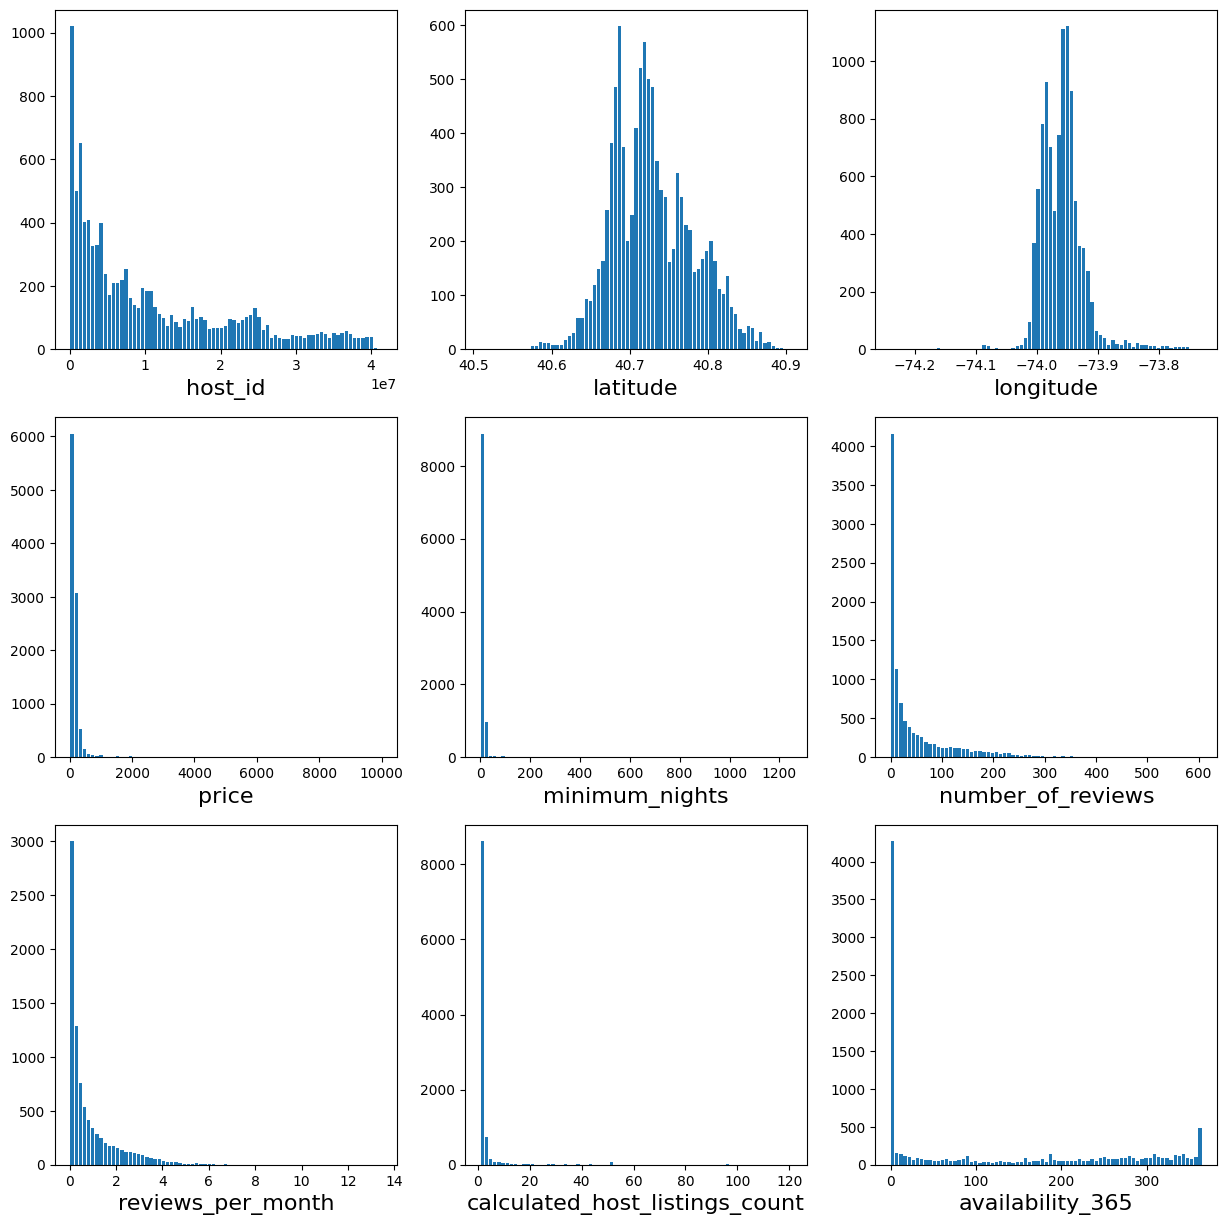

In [7]:
# Obtain numerical features names
num_names = list(numerical_features)
num_names


f, axes = plt.subplots(3, 3, figsize = (20, 7))
f.set_size_inches(15, 15)
# f.tight_layout()

axes = axes.reshape(9)

for i in range(0, 9):
  # print(nnames[i])
  axes[i].hist(numerical_features[[num_names[i]]], bins = 75, rwidth = .8)
  axes[i].set_xlabel(numerical_features.columns[i], fontsize = 16)
  # axes[i].set_title(num_names[i], fontsize = 20)

plt.show()

In [8]:
# Get the minimum, maximum, and average price
print("Minimum price:", min(data.price))
print("Maximum price:", max(data.price))
print("Average price:", np.mean(data.price)) # data.price.mean()

Minimum price: 10
Maximum price: 10000
Average price: 162.0891089108911


### 2) Construct the scatter plots of price with each of the numerical features.

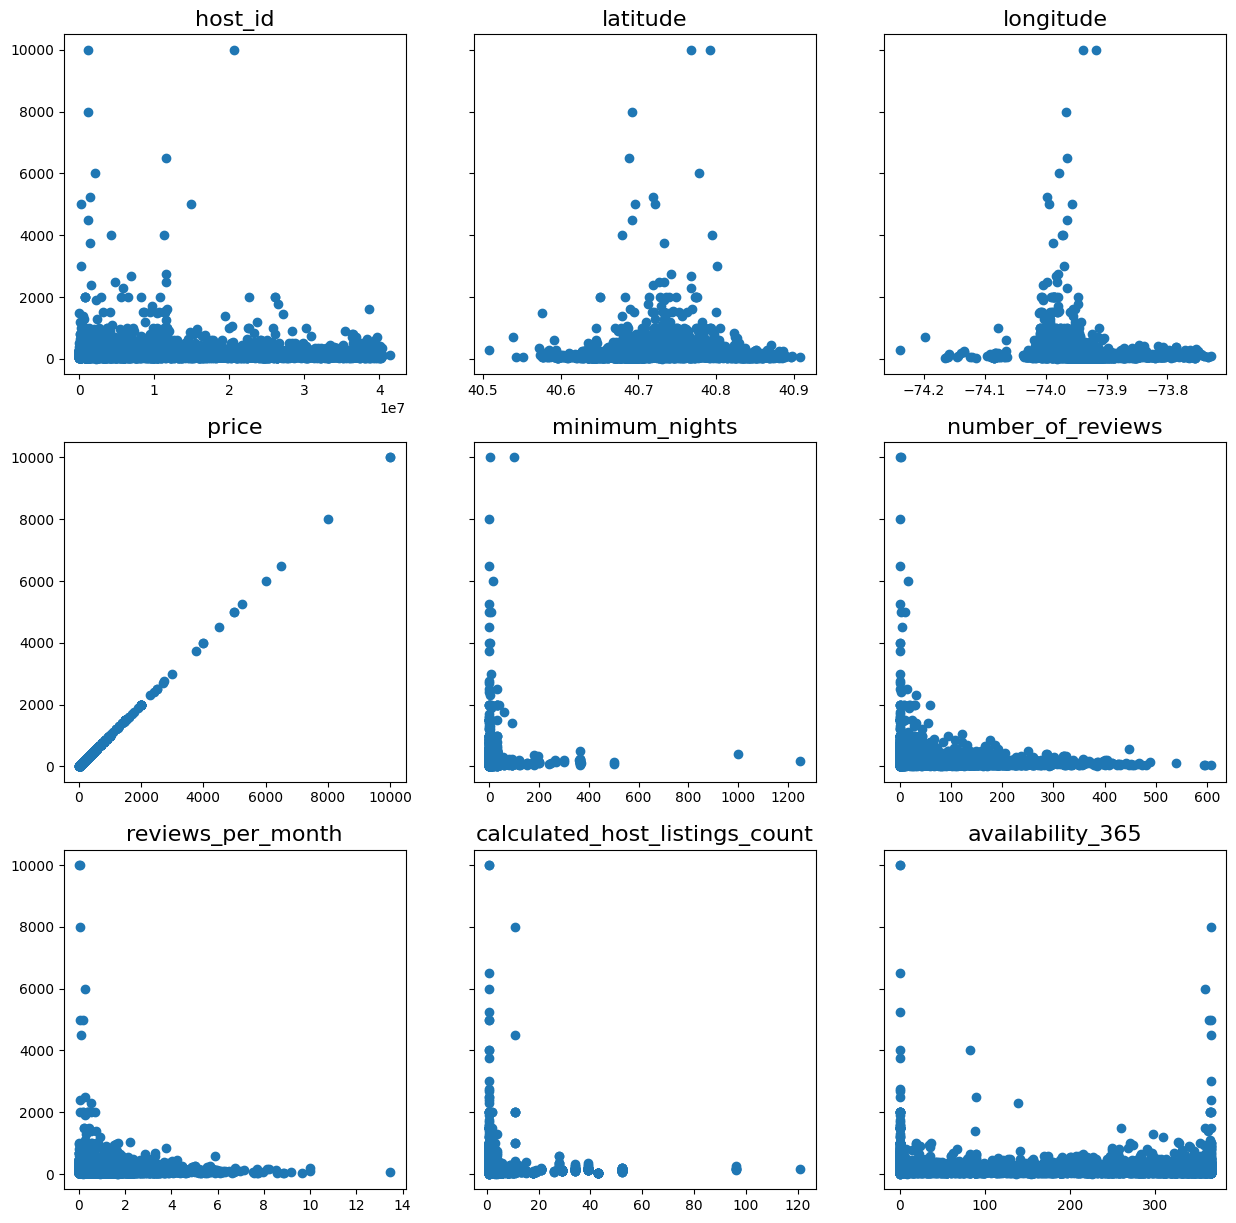

In [9]:
# Obtain numerical features names
num_names = list(numerical_features)
num_names

f, axes = plt.subplots(3, 3, sharey = True)
f.set_size_inches(15, 15)
# f.tight_layout()

axes = axes.reshape(9)

for i in range(0, 9):
  # print(nnames[i])
  axes[i].plot(numerical_features[num_names[i]], numerical_features.price, 'o')
  axes[i].set_title(num_names[i], fontsize = 16)


plt.show()

### 3) Display the correlation histogram.

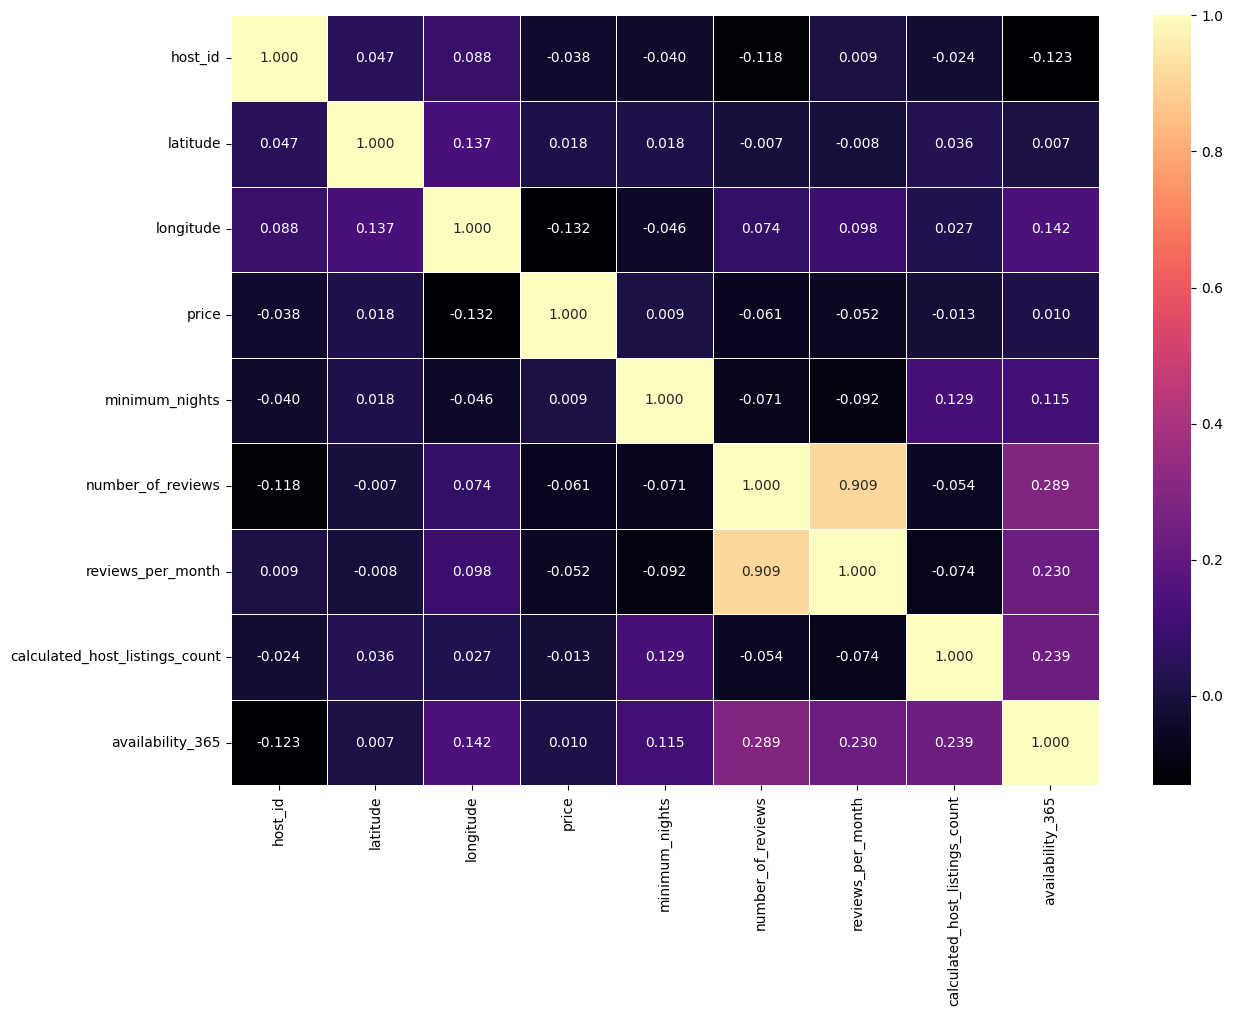

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (14, 10))

# sns.set(font_scale = 1.4)
sns.heatmap(numerical_features.corr(), ax= ax, linewidth=0.5, annot = True, fmt=".3f", cmap = "magma")
plt.show()

In [11]:
numerical_features.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.047216,0.088338,-0.037943,-0.040252,-0.118066,0.009303,-0.023930,-0.123044
latitude,0.047216,1.000000,0.136623,0.018310,0.017739,-0.007246,-0.008119,0.036192,0.006747
longitude,0.088338,0.136623,1.000000,-0.131561,-0.045763,0.073975,0.097509,0.027376,0.142324
price,-0.037943,0.018310,-0.131561,1.000000,0.009302,-0.061049,-0.052015,-0.013230,0.010219
minimum_nights,-0.040252,0.017739,-0.045763,0.009302,1.000000,-0.071107,-0.092018,0.128604,0.115059
number_of_reviews,-0.118066,-0.007246,0.073975,-0.061049,-0.071107,1.000000,0.909053,-0.053937,0.289289
reviews_per_month,0.009303,-0.008119,0.097509,-0.052015,-0.092018,0.909053,1.000000,-0.074148,0.230191
calculated_host_listings_count,-0.023930,0.036192,0.027376,-0.013230,0.128604,-0.053937,-0.074148,1.000000,0.239173
availability_365,-0.123044,0.006747,0.142324,0.010219,0.115059,0.289289,0.230191,0.239173,1.000000


### 4) Which numerical feature appears to be most predictive of the price?

Each numerical feature exhibits a low correlation with respect to the price. Consequently, it is challenging to pinpoint a single feature as the most predictive of the price. Instead, we may consider exploring combinations of different features to conduct more effective price prediction.



### 5) Using numerical features to predict the renting price with linear model. Write down the predict function.

Before running alinear model, let's check if numerical features has any missing values.

In [12]:
# Check if any NA value in dataset
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         9999 non-null   int64  
 1   latitude                        9999 non-null   float64
 2   longitude                       9999 non-null   float64
 3   price                           9999 non-null   int64  
 4   minimum_nights                  9999 non-null   int64  
 5   number_of_reviews               9999 non-null   int64  
 6   reviews_per_month               8677 non-null   float64
 7   calculated_host_listings_count  9999 non-null   int64  
 8   availability_365                9999 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 703.2 KB


In [13]:
numerical_features.columns

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

"review_per_month" contains missing values. In addition, we found it shows a high coefficent with "number_of_reviews" from heatmap above. We can assume they share a similar feature interpretation or weight within this dataset. Therefore, let's select "number_of_reviews" as a feature for our model.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# select features
selected_features = ['host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

# Prepare the data
X = data[selected_features] # only numerical features
y = data['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)


In [20]:
# Create and train the linear model
model = LinearRegression()
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

In [21]:
# Evaluation

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Square Error: {mse}')


Mean Square Error: 53484.90286377333


In a linear regression model, we can present the equation as:     

  y = ax + b  

Where:  

y is the predicted value.   
x is the independent variables.   
a is the coefficient (slope).   
b is the intercept.  

In [22]:
# Get the coefficients (a1, a2, ..., an) and intercept (b)
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-6.77041373e-07  2.15682846e+02 -9.99767717e+02 -5.52319252e-02
 -2.67160500e-01 -1.09672511e+00  1.05552943e-01]
Intercept: -82554.49972389318


The predict function for this linear regression would be:    

y = (-6.77041373e-07) * x1 + (2.15682846e+02) * x2 - (9.99767717e+02) * x3 - (5.52319252e-02) * x4 - (2.67160500e-01) * x5 - (1.09672511e+00) * x6 + (1.05552943e-01) * x7 - 82554.49972389318

### 6) Calculate the RSS cost.

RSS = ((y - y_pred) ** 2).sum()


In [24]:
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # X and y are your feature matrix and target variable

# Make predictions
y_pred = model.predict(X_test)

# Calculate RSS
RSS = ((y_test - y_pred) ** 2).sum()

print(f'Residual Sum of Squares (RSS): {RSS}')


Residual Sum of Squares (RSS): 53484902.86377333
